## Ejercicio 3

Julián Cámara Miró

In [56]:
import matplotlib.pyplot as plt

def plot_histogram(result: dict, width=5) -> None:
    
    counts = sorted(result.items(), key=lambda x: x[0])
    
    keys = [str(list(x[0]))[1:-1].replace(', ', '') for x in counts]
    values = [x[1] for x in counts]

    plt.figure(figsize=(width, 5))
    plt.bar_label(plt.bar(keys, [x / 1000 for x in values]), values)

In [92]:
from pytket.extensions.qiskit import AerBackend

def run(circuit):
    backend = AerBackend()
    c = backend.get_compiled_circuit(circuit)
    counts = backend.run_circuit(c, n_shots=1000).get_counts()

    plot_histogram(counts)

### 2 qubits

Los pasos a seguir para aplicar el algoritmo son prácticamente iguales a los del ejercicio anterior, pero con varios qubits:

1. Primero aplicamos una puerta X al qubit2 para poder obtener el estado *-* y usar el phase-kickback.
2. Luego, ponemos todos los qubits en superposición.
3. Aplicamos el oráculo.
4. Al salir del oráculo, el resultado del algoritmo se encuentra en los qubits en superposición. Aplicamos otra vez puertas hadamard para deshacer el paso 1, y observamos que:

    - Si la salida es todo ceros, se trata de una función constante.
    - En otro caso, se trata de una función balanceada.

Vamos a probar primero con una función balanceada:

In [98]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(3, 2)

circ.X(2)
for i in range(3):
    circ.H(i)

circ.add_barrier(circ.qubits)

# Oráculo

circ.CX(1, 2)

circ.add_barrier(circ.qubits)
for i in range(3):
    circ.H(i)


circ.Measure(0, 0)
circ.Measure(1, 1)

render_circuit_jupyter(circ)

Compilamos el circuito y lo ejecutamos en un backend de Qiskit.

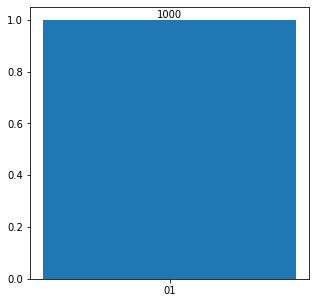

In [99]:
run(circ)

Probamos otra función balanceada:

In [96]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(3, 2)

circ.X(2)
for i in range(3):
    circ.H(i)

circ.add_barrier(circ.qubits)

# Oráculo
circ.CX(0, 2)

circ.X(1)
circ.CX(1, 2)

circ.add_barrier(circ.qubits)
for i in range(3):
    circ.H(i)


circ.Measure(0, 0)
circ.Measure(1, 1)

render_circuit_jupyter(circ)

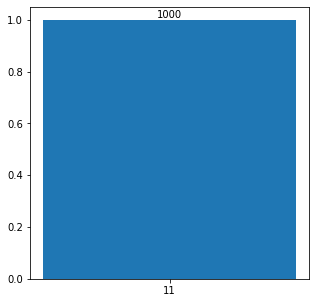

In [97]:
run(circ)

Vemos que, en ambos casos, hemos medido un resultado distinto a *00* siempre, por lo que podemos afirmar que las funciones que aplican ambos oráculos son balanceadas.

Probamos ahora con una función constante:

In [100]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(3, 2)

circ.X(2)
for i in range(3):
    circ.H(i)

circ.add_barrier(circ.qubits)

# Oráculo
circ.CX(0, 2)
circ.X(0)
circ.CX(0, 2)

circ.X(1)
circ.CX(1, 2)
circ.X(1)
circ.CX(1, 2)

circ.add_barrier(circ.qubits)
for i in range(3):
    circ.H(i)


circ.Measure(0, 0)
circ.Measure(1, 1)

render_circuit_jupyter(circ)

Probamos de nuevo con el simulador de Qiskit.

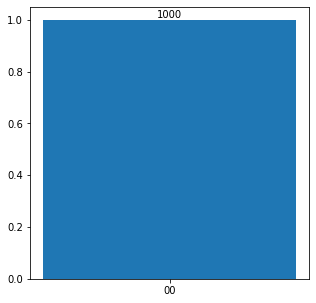

In [101]:
run(circ)

Solo medimos 00, por lo que podemos deducir que la función es balanceada.

### 3 qubits

El circuito va a ser prácticamente igual al anterior, pero con tres qubits más uno auxiliar.

Primero función balanceada:

In [117]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(4, 3)

circ.X(3)
for i in range(4):
    circ.H(i)

circ.add_barrier(circ.qubits)

# Oráculo
circ.CX(0, 3)

circ.X(1)
circ.CCX(1, 2, 3)

circ.add_barrier(circ.qubits)
for i in range(3):
    circ.H(i)


circ.Measure(0, 0)
circ.Measure(1, 1)
circ.Measure(2, 2)

render_circuit_jupyter(circ)

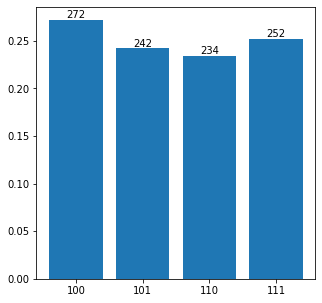

In [122]:
run(circ)

Observamos de nuevo que, al tratarse de una función balanceada, tenemos una posibilidad del 0% de medir 000. Sin embargo esta vez, al usar una puerta Toffoli, vemos que ya no siempre medimos un mismo estado el 100% de las veces, sino que tenemos un 25% de posibilidades de medir cada uno de los estados en los que q0 vale 1.

In [124]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(4, 3)

circ.X(3)
for i in range(4):
    circ.H(i)

circ.add_barrier(circ.qubits)

# Oráculo
circ.CX(0, 3)

circ.X(1)
circ.CX(1, 3)

circ.add_barrier(circ.qubits)
for i in range(3):
    circ.H(i)


circ.Measure(0, 0)
circ.Measure(1, 1)
circ.Measure(2, 2)

render_circuit_jupyter(circ)

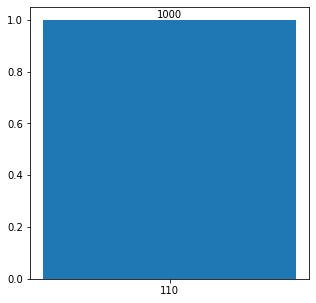

In [125]:
run(circ)

Ahora, al no haber puerta Toffoli, siempre medimos el mismo estado.

Si probamos ahora con una función constante, el resultado debería ser el mismo:

In [127]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(4, 3)

circ.X(3)
for i in range(4):
    circ.H(i)

circ.add_barrier(circ.qubits)

# Oráculo


circ.add_barrier(circ.qubits)
for i in range(3):
    circ.H(i)


circ.Measure(0, 0)
circ.Measure(1, 1)
circ.Measure(2, 2)

render_circuit_jupyter(circ)

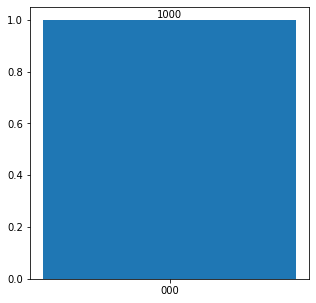

In [128]:
run(circ)